# レシピレベル上げシミュレーター

- 対象レシピのエナジー、フィールドボーナス、現在のレシピレベルを設定
- 大成功なしで料理した回数とその時のレシピレベル、次回のエナジーを算出

## 対象レシピ設定

In [1]:
init_energy = (151*22 + 140*30 + 121*22 + 101*42)*1.78
field_bonus = 1.8
event_bonus = 1.5
recipe_level = 1

## データ取り込み、チェック

In [2]:
level_data = [
    {"level": 1, "bonus": 0.00, "exp": 0, "total": 0},
    {"level": 2, "bonus": 0.02, "exp": 1080, "total": 1080},
    {"level": 3, "bonus": 0.04, "exp": 1244, "total": 2324},
    {"level": 4, "bonus": 0.06, "exp": 1612, "total": 3936},
    {"level": 5, "bonus": 0.08, "exp": 1609, "total": 5545},
    {"level": 6, "bonus": 0.09, "exp": 1796, "total": 7341},
    {"level": 7, "bonus": 0.11, "exp": 2371, "total": 9712},
    {"level": 8, "bonus": 0.13, "exp": 3048, "total": 12760},
    {"level": 9, "bonus": 0.16, "exp": 3666, "total": 16426},
    {"level": 10, "bonus": 0.18, "exp": 4365, "total": 20791},
    {"level": 11, "bonus": 0.19, "exp": 4848, "total": 25639},
    {"level": 12, "bonus": 0.21, "exp": 5272, "total": 30911},
    {"level": 13, "bonus": 0.23, "exp": 5710, "total": 36621},
    {"level": 14, "bonus": 0.24, "exp": 6301, "total": 42922},
    {"level": 15, "bonus": 0.26, "exp": 6960, "total": 49882},
    {"level": 16, "bonus": 0.28, "exp": 7669, "total": 57551},
    {"level": 17, "bonus": 0.30, "exp": 8450, "total": 66001},
    {"level": 18, "bonus": 0.31, "exp": 9130, "total": 75131},
    {"level": 19, "bonus": 0.33, "exp": 9850, "total": 84981},
    {"level": 20, "bonus": 0.35, "exp": 10661, "total": 95642},
    {"level": 21, "bonus": 0.37, "exp": 11517, "total": 107159},
    {"level": 22, "bonus": 0.40, "exp": 12417, "total": 119576},
    {"level": 23, "bonus": 0.42, "exp": 13362, "total": 132938},
    {"level": 24, "bonus": 0.45, "exp": 14371, "total": 147309},
    {"level": 25, "bonus": 0.47, "exp": 15312, "total": 162621},
    {"level": 26, "bonus": 0.50, "exp": 16308, "total": 178929},
    {"level": 27, "bonus": 0.52, "exp": 17634, "total": 196563},
    {"level": 28, "bonus": 0.55, "exp": 19042, "total": 215605},
    {"level": 29, "bonus": 0.58, "exp": 20544, "total": 236149},
    {"level": 30, "bonus": 0.61, "exp": 22150, "total": 258299},
    {"level": 31, "bonus": 0.64, "exp": 23656, "total": 281955},
    {"level": 32, "bonus": 0.67, "exp": 24804, "total": 306759},
    {"level": 33, "bonus": 0.70, "exp": 26010, "total": 332769},
    {"level": 34, "bonus": 0.74, "exp": 27700, "total": 360469},
    {"level": 35, "bonus": 0.77, "exp": 29474, "total": 389943},
    {"level": 36, "bonus": 0.81, "exp": 31578, "total": 421521},
    {"level": 37, "bonus": 0.84, "exp": 33859, "total": 455380},
    {"level": 38, "bonus": 0.88, "exp": 35675, "total": 491055},
    {"level": 39, "bonus": 0.92, "exp": 37608, "total": 528663},
    {"level": 40, "bonus": 0.96, "exp": 40255, "total": 568918},
    {"level": 41, "bonus": 1.00, "exp": 42623, "total": 611541},
    {"level": 42, "bonus": 1.04, "exp": 45105, "total": 656646},
    {"level": 43, "bonus": 1.08, "exp": 47698, "total": 704344},
    {"level": 44, "bonus": 1.13, "exp": 50404, "total": 754748},
    {"level": 45, "bonus": 1.17, "exp": 52436, "total": 807184},
    {"level": 46, "bonus": 1.22, "exp": 55021, "total": 862205},
    {"level": 47, "bonus": 1.27, "exp": 58731, "total": 920936},
    {"level": 48, "bonus": 1.32, "exp": 62654, "total": 983590},
    {"level": 49, "bonus": 1.37, "exp": 66801, "total": 1050391},
    {"level": 50, "bonus": 1.42, "exp": 71191, "total": 1121582},
    {"level": 51, "bonus": 1.48, "exp": 75105, "total": 1196687},
    {"level": 52, "bonus": 1.53, "exp": 122798, "total": 1319485},
    {"level": 53, "bonus": 1.59, "exp": 151878, "total": 1471363},
    {"level": 54, "bonus": 1.65, "exp": 201226, "total": 1672589},
    {"level": 55, "bonus": 1.71, "exp": 258289, "total": 1930878},
    {"level": 56, "bonus": 1.77, "exp": 300444, "total": 2231322},
    {"level": 57, "bonus": 1.83, "exp": 347990, "total": 2579312},
    {"level": 58, "bonus": 1.90, "exp": 398682, "total": 2977994},
    {"level": 59, "bonus": 1.97, "exp": 435126, "total": 3413120},
    {"level": 60, "bonus": 2.03, "exp": 478025, "total": 3891145},
    {"level": 61, "bonus": 2.09, "exp": 542412, "total": 4433557},
    {"level": 62, "bonus": 2.15, "exp": 621231, "total": 5054788},
    {"level": 63, "bonus": 2.21, "exp": 718231, "total": 5773019},
    {"level": 64, "bonus": 2.27, "exp": 833386, "total": 6606405},
    {"level": 65, "bonus": 2.34, "exp": 992698, "total": 7599103},
]

# データチェック
exp_sum = 0
for i, data in enumerate(level_data):
    lv = data["level"]
    bonus = data["bonus"]
    exp = data["exp"]
    total = data["total"]
    exp_sum += exp
    assert i+1==lv, f"i+1: {i+1} != lv: {lv}"
    assert exp_sum==total, f"exp_sum: {exp_sum} != total: {total}"

In [3]:
total_energy = level_data[recipe_level-1]["total"]
energy = int(init_energy*(1+level_data[recipe_level-1]["bonus"])*field_bonus*event_bonus)
cnt = 0
total_energy_list = [0]
next_energy_list = [energy]

while recipe_level < len(level_data):
    total_energy += energy  # 料理作成
    cnt += 1
    
    # 二分探索で次のレベルを探す
    (ok, ng) = (0, len(level_data))
    while ok+1 < ng:
        m = (ng+ok)//2
        total = level_data[m]["total"]
        if total_energy >= total:
            ok = m
        else:
            ng = m
    next_level = ok+1
    
    i = next_level-1
    bonus = level_data[i]["bonus"]
    total = level_data[i]["total"]
    next_energy = int(init_energy*(1+bonus)*field_bonus*event_bonus)

    print(f"料理回数: {cnt}, レシピレベル: {recipe_level}=>{next_level}, エナジー: {energy:,}=>{next_energy:,}, 増分: {next_energy-energy:,}, 累計エナジー: {total_energy:,}")
    total_energy_list.append(total_energy)
    next_energy_list.append(next_energy)
    recipe_level = next_level
    energy = next_energy
    

料理回数: 1, レシピレベル: 1=>17, エナジー: 69,331=>90,130, 増分: 20,799, 累計エナジー: 69,331
料理回数: 2, レシピレベル: 17=>24, エナジー: 90,130=>100,530, 増分: 10,400, 累計エナジー: 159,461
料理回数: 3, レシピレベル: 24=>30, エナジー: 100,530=>111,623, 増分: 11,093, 累計エナジー: 259,991
料理回数: 4, レシピレベル: 30=>34, エナジー: 111,623=>120,636, 増分: 9,013, 累計エナジー: 371,614
料理回数: 5, レシピレベル: 34=>38, エナジー: 120,636=>130,342, 増分: 9,706, 累計エナジー: 492,250
料理回数: 6, レシピレベル: 38=>41, エナジー: 130,342=>138,662, 増分: 8,320, 累計エナジー: 622,592
料理回数: 7, レシピレベル: 41=>44, エナジー: 138,662=>147,675, 増分: 9,013, 累計エナジー: 761,254
料理回数: 8, レシピレベル: 44=>46, エナジー: 147,675=>153,915, 増分: 6,240, 累計エナジー: 908,929
料理回数: 9, レシピレベル: 46=>49, エナジー: 153,915=>164,315, 増分: 10,400, 累計エナジー: 1,062,844
料理回数: 10, レシピレベル: 49=>51, エナジー: 164,315=>171,941, 増分: 7,626, 累計エナジー: 1,227,159
料理回数: 11, レシピレベル: 51=>52, エナジー: 171,941=>175,408, 増分: 3,467, 累計エナジー: 1,399,100
料理回数: 12, レシピレベル: 52=>53, エナジー: 175,408=>179,568, 増分: 4,160, 累計エナジー: 1,574,508
料理回数: 13, レシピレベル: 53=>54, エナジー: 179,568=>183,728, 増分: 4,160, 累計エナジー: 1,754,076

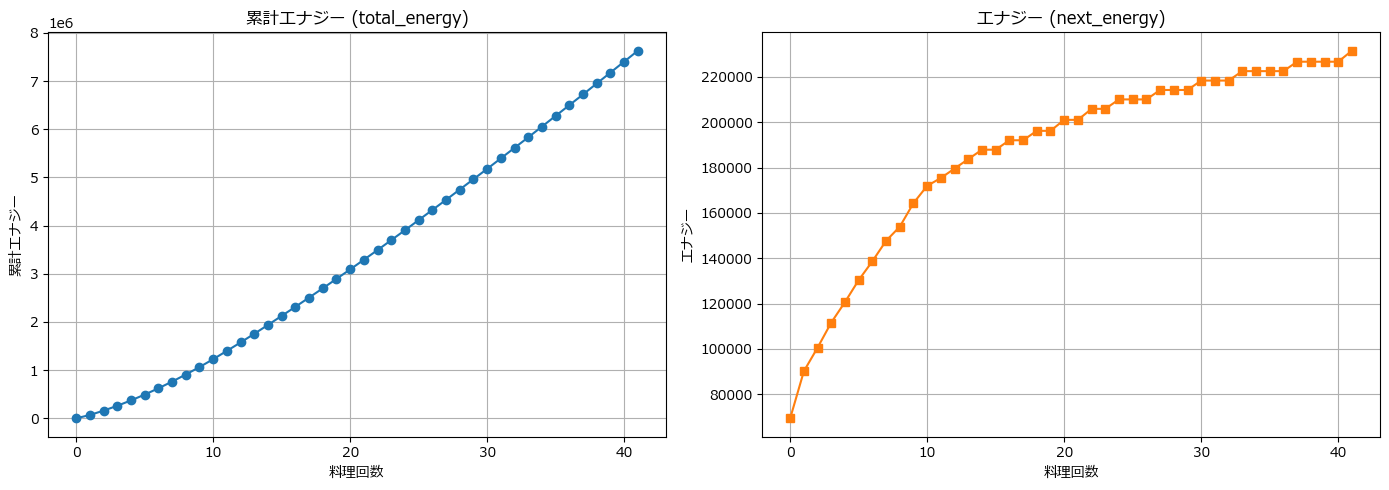

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Meiryo'

# x軸は料理回数（データ数に応じて自動生成）
x = range(0, len(total_energy_list))

plt.figure(figsize=(14, 5))

# --- 左: 累計エナジー ---
plt.subplot(1, 2, 1)
plt.plot(x, total_energy_list, marker="o", color="tab:blue")
plt.title("累計エナジー (total_energy)")
plt.xlabel("料理回数")
plt.ylabel("累計エナジー")
plt.grid(True)

# --- 右: エナジー ---
plt.subplot(1, 2, 2)
plt.plot(x, next_energy_list, marker="s", color="tab:orange")
plt.title("エナジー (next_energy)")
plt.xlabel("料理回数")
plt.ylabel("エナジー")
plt.grid(True)

plt.tight_layout()
plt.show()